In [68]:
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.ldamodel import LdaModel

# import nltk

# NLTK Downloader required
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

import re
# from nltk.corpus import stopwords 
# from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer
# from nltk.stem import WordNetLemmatizer 
#remember to remove non-English characters

import pandas as pd
import numpy as np
#from matplotlib import pyplot as plt

import statistics
import math

from datetime import datetime
from time import mktime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler 

# import category_encoders as ce

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

from joblib import dump
# add other imports if needed

In [69]:
df= pd.read_csv('heart_2020_cleaned.csv/heart_2020_cleaned.csv')
# df = pd.DataFrame(data)
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [70]:
# features = [ "age",	"gender", "height",	"weight", "ap_hi", "ap_lo", "cholesterol", "gluc",	"smoke", "alco", "active"]
# cat_columns = ['HeartDisease', 'Smoking	', 'AlcoholDrinking	', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory	', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']  # Replace with your actual column names
categorical = [var for var in df.columns if df[var].dtype == "O"]
# Applying one-hot encoding to each categorical column
label_encoder = LabelEncoder()

# Open a text file in write mode
with open('label_encoding_mapping.txt', 'w') as file:
    # Assuming 'categorical' is a list of your categorical column names
    for col in categorical:
        # Initialize the LabelEncoder for each column
        label_encoder = LabelEncoder()
        
        # Fit and transform the data for each column and create a new encoded column
        df[col + '_encoded'] = label_encoder.fit_transform(df[col])
        
        # Get the mapping from original categories to encoded values
        label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        
        # Write the mapping for the current column to the file
        file.write(f"Mapping for '{col}': {label_mapping}\n\n")
    
df = df.drop(categorical, axis = 1)
col_to_drop = ["Race_encoded", "SkinCancer_encoded", "KidneyDisease_encoded", "Asthma_encoded", "Diabetic_encoded", "Sex_encoded", "DiffWalking_encoded", "AlcoholDrinking_encoded", "Smoking_encoded", "HeartDisease_encoded"]
# X = df.drop(col_to_drop, axis=1)
X = df.drop("Stroke_encoded", axis = 1)
y = df["Stroke_encoded"]
# y = np.where(y == 1, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_encoded,Smoking_encoded,AlcoholDrinking_encoded,Stroke_encoded,DiffWalking_encoded,Sex_encoded,AgeCategory_encoded,Race_encoded,Diabetic_encoded,PhysicalActivity_encoded,GenHealth_encoded,Asthma_encoded,KidneyDisease_encoded,SkinCancer_encoded
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,7,5,2,1,4,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,12,5,0,1,4,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,9,5,2,1,1,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,11,5,0,0,2,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,4,5,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,8,3,2,0,1,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,3,3,0,1,4,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,5,3,0,1,2,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,1,3,0,0,2,0,0,0


In [71]:
sm = RandomUnderSampler(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
# X_test, y_test = sm.fit_resample(X_test, y_test)

y_train.value_counts()

Stroke_encoded
0    8448
1    8448
Name: count, dtype: int64

In [72]:
# scaler = MinMaxScaler()
# cols = X_train.columns.tolist()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=cols)
# X_test = pd.DataFrame(X_test, columns=cols)

In [73]:
# Instantiate the model
# logreg = LogisticRegression(solver='liblinear', random_state=42)
rforest = RandomForestClassifier(n_estimators = 20, random_state=42)
# rf = xgb.XGBClassifier(
#     n_estimators=100, 
#     learning_rate=0.1, 
#     max_depth=6, 
#     min_child_weight=1, 
#     subsample=0.8, 
#     colsample_bytree=0.8, 
#     gamma=0,
#     reg_alpha=0.001,
#     reg_lambda=1,
#     seed=42
# )

In [74]:
# # Fit the model, use logreg for Logistic Regression and reg for Random Forest
# logreg.fit(X_train, np.ravel(y_train))
# coef = logreg.coef_[0]

# data = []

# for i in range(len(coef)):
#     data.append(abs(coef[i]))
# # from sklearn.preprocessing import normalize
# # print(normalize([data]))

# plotdf = pd.DataFrame(data, X_train.columns, columns=["weight"])
# # plotdf.sort_values(by="weight", ascending=True, inplace=True)
# plotdf.plot.barh(title="Metrics weight coefficient (Logistic regression)")
# data = data[::-1]
# df = pd.DataFrame(columns = ['Name', 'Articles', 'Improved'])

array([0.01674721, 0.01054763, 0.01849689, 0.05983904, 0.02265917,
       0.03062372, 0.03433817, 0.16088969, 0.02745178, 0.06610419,
       0.00999907, 0.02443276, 0.0837384 , 0.08285267, 0.0566485 ,
       0.07440067, 0.22023046])

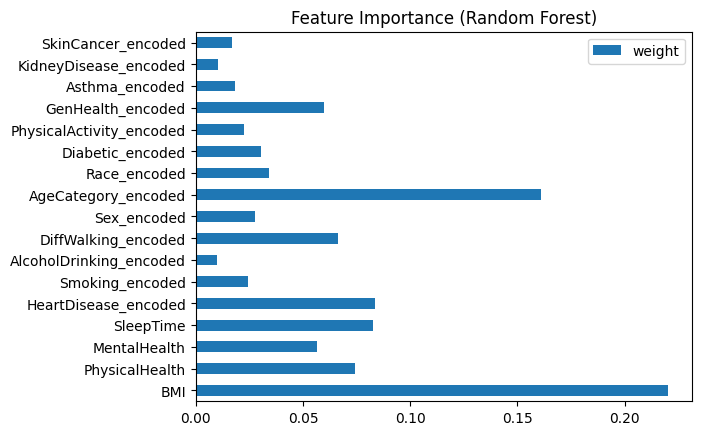

In [75]:
rforest.fit(X_train, np.ravel(y_train))

plotdfRF = pd.DataFrame(rforest.feature_importances_, index = X_train.columns, columns = ["weight"])
# plotdfRF.sort_values(by = "weight", ascending = True, inplace = True)
plotdfRF.plot.barh(title = "Feature Importance (Random Forest)")
rforest.feature_importances_[::-1]

In [76]:
# rf.fit(X_train, np.ravel(y_train))

In [77]:
# iso_forest = IsolationForest(contamination=0.04)  # Set contamination to the expected proportion of outliers
# iso_forest.fit(X_train, np.ravel(y_train))

In [78]:
y_pred_test = rforest.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test))
# y_pred_test

Model accuracy score: 0.7171
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     92318
           1       0.09      0.73      0.16      3621

    accuracy                           0.72     95939
   macro avg       0.54      0.72      0.50     95939
weighted avg       0.95      0.72      0.80     95939



In [79]:
# clf = RandomForestClassifier(random_state=42)

# scores = cross_val_score(rforest, X_train, np.ravel(y_train), cv=10)

# rforest.fit(X_train, np.ravel(y_train))

# y_pred_test = rforest.predict(X_test)
# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# print(classification_report(y_test, y_pred_test))

In [80]:
# # Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [100, 200, 300], # Number of trees in the forest
#     'max_depth': [10, 20, 30],       # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
# }

# # Create a base model
# rf = RandomForestClassifier(random_state=42)

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

# # Train a new model with the best parameters
# best_clf = RandomForestClassifier(**best_params, random_state=42)
# best_clf.fit(X_train, y_train)

# # Predict and evaluate on the test set using the tuned model
# y_test_pred = best_clf.predict(X_test)
# print('Test Set Accuracy with Tuned Model: {0:0.4f}'.format(accuracy_score(y_test, y_test_pred)))


In [81]:
# print(classification_report(y_test, y_pred_test))

In [82]:
dump(rforest, 'rf_classifier.joblib')

['rf_classifier.joblib']